In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from PyAstronomy.pyasl import decimalYearGregorianDate 
import matplotlib.dates as mdates 
plt.style.use("bmh")

In [3]:
braz = pd.read_csv("DATA/BRAZ.txt",sep="\t",header=None) 
braz_dt = pd.DataFrame() 
braz_dt["DATE"] = pd.to_datetime(braz[0].apply(decimalYearGregorianDate,
                                                form = "dd-mm-yyyy"),
                                                dayfirst=True) 
braz_dt["datedecimal"] = braz[0] 
braz_dt["Altitude"] = braz[1] 
braz_dt.set_index("DATE",inplace=True) 
braz_dt.head()

,datedecimal,Altitude
DATE,,
2000-01-03,2000.005479,1106.005292
2000-01-10,2000.024658,1106.011600
2000-01-17,2000.043836,1106.015597
2000-01-24,2000.063014,1106.011620
2000-01-31,2000.082192,1106.010311


In [4]:
lr = np.poly1d(np.polyfit(braz_dt.datedecimal,braz_dt.Altitude,1))

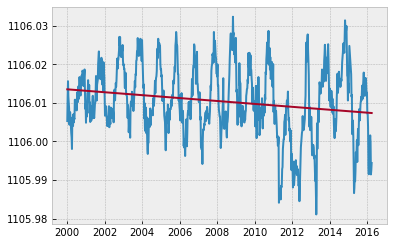

In [5]:
plt.plot(braz_dt.datedecimal,braz_dt.Altitude) 
plt.plot(braz_dt.datedecimal, lr(braz_dt.datedecimal)) 
plt.ticklabel_format(useOffset=False)

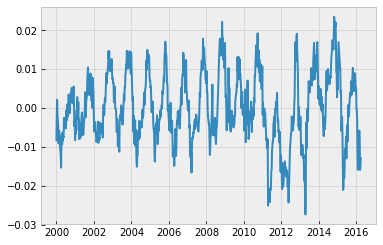

In [6]:
braz_dt["Altitude_non_trend"] = braz_dt.Altitude - lr(braz[0]) 
plt.plot(braz_dt.datedecimal,braz_dt.Altitude_non_trend)

In [7]:
def smooth(x,window_len=11,window='hanning'): 
    """smooth the data using a window with requested size. 
    This method is based on the convolution of a scaled window with the signal. 
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size)in both ends so that transient parts are minimized 
    in the begining and end part of the output signal. 

    input: 
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer

        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman' 

        flat window will produce a moving average smoothing. 

    output: the smoothed signal 

    example: 

    t=linspace(-2,2,0.1) 
    x=sin(t)+randn(len(t))*0.1 
    y=smooth(x) 

    see also: 

    np.hanning, np.hamming, np.bartlett, np.blackman, np.convolve 
    scipy.signal.lfilter 

    TODO: the window parameter could be the window itself if an array instead of a string 

    NOTE: length(output) != length(input), 
    to correct this: return y[(window_le n/2-1):-(window_len/2)] instead of just y. 
    """ 
    
    if x.ndim != 1: 
        raise ValueError 
        
    if x.size < window_len: 
        raise ValueError 
        
    if window_len<3: 
        return x 
    
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']: 
        raise ValueError
        
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]] 
    #print(len(s)) 
    if window == 'flat': #moving average 
        w=np.ones(window_len,'d') 
    else: 
        w=eval('np.'+window+'(window_len)')
        
    y=np.convolve(w/w.sum(),s,mode='valid') 
    
    return y[(int(window_len/2)-1):-int(window_len/2)-1]
        

In [8]:
braz_dt["Altitude_smooth"] = smooth(braz_dt.Altitude_non_trend)

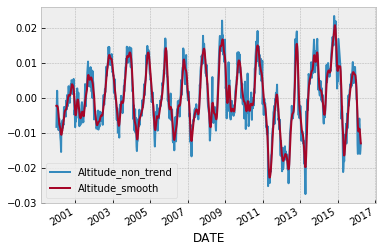

In [9]:
braz_dt[["Altitude_non_trend","Altitude_smooth"]].plot()

In [10]:
braz_dt.to_csv("DATA/gnss_braz.csv")